In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pathlib


# a) Berechnen Sie p und q fuer diese Polynome.
Wir haben
`(x + 1)(x + 1 + a) = x^2 + (2 + a)x + (1 + a) = x^2 + 2(1 + a/2)x - (-(1 + a))`

Es folgt
`p = (1 + a/2), q = -(1 + a)`

In [2]:
# config vars
OUTDIR="./out"
ALPHA_MIN = 1
ALPHA_MAX = 10

# 'Aufloesung' von alpha. Bei 0.1 kriegt man gute Ergebnisse (Also einen sichtbaren Fehler). Bei 0.5 z.B nicht mehr.
STEP = 0.1 

# Alle `float`-Typen, die ausprobiert werden sollen
FLOAT_TYPES=[np.float128, np.float64, np.float32, np.float16] 

# b) Implementieren Sie φ(p, q)...

In [3]:
def get_pq0(p, q, float_t=np.float64):
    rp = float_t(p)
    rq = float_t(q)

    pos_sq = -rp + math.sqrt((rp**2) + rq)
    neg_sq = -rp - math.sqrt((rp**2) + rq)
    
    return [pos_sq, neg_sq]

def get_alphas(s_min, s_max, step, float_t=np.float64):
    total_steps = int((s_max - s_min)/step)

    return [float_t(step * n) + s_min for n in range(total_steps + 1)]

def get_pq(a, float_t=np.float64):
    ra = float_t(a)
    return [(1 + ra/2), -(1 + ra)]



# ...und plotten Sie den Fehler zu der tatsaechlichen Nullstelle ueber α mit ausreichend Aufloesung in α.

In [54]:
def get_err(float_t=np.float64):
    alphas = get_alphas(ALPHA_MIN, ALPHA_MAX, STEP, float_t)

    # bei jedem wert von alpha gibt es 2 nullstellen. das output ist also ein
    # vektor
    pq_zeros = np.array([get_pq0(*get_pq(a), float_t=float_t) for a in alphas])
    alg_zeros = np.array([[-1, -(1 + a)] for a in alphas])


    # fuer jeden Wert von α gibt es 2 Nullstellen. Durch ausprobieren haben wir festgestellt,
    # dass die positive Wurzel von (p^2) + q der Nullstelle -1 entspricht. Dieser Wert ist immer
    # in der ersten Stelle von dem array, was von `get_pq0` erzeugt wird.
    err_pos = [np.abs(pq[0] - alg[0]) for (pq, alg) in zip(pq_zeros, alg_zeros)]
    err_neg = [np.abs(pq[1] - alg[1]) for (pq, alg) in zip(pq_zeros, alg_zeros)]
    

    return {"alphas": alphas, 
            "pq_zeros": pq_zeros, 
            "alg_zeros": alg_zeros, 
            "err_pos": err_pos,
            "err_neg": err_neg}
    


def get_err_plot(alphas, err_pos, err_neg, float_t=np.float64):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].scatter(alphas, err_pos)
    axs[0].set_title(f"α vs. err ({float_t})\nNullstelle -1")
    axs[0].set_xlabel("α")
    axs[0].set_ylabel("err")

    axs[1].scatter(alphas, err_neg)
    axs[1].set_title(f"α vs. err ({float_t})\nNullstelle -(1 + α) ")
    axs[1].set_xlabel("α")
    axs[1].set_ylabel("err")
    
    fig.suptitle("Grafik 1: Fehler von φ")
    return fig

In [51]:
outdir = pathlib.Path("./out")
outdir.mkdir(exist_ok=True)
path = outdir / f"alpha_vs_err_default"

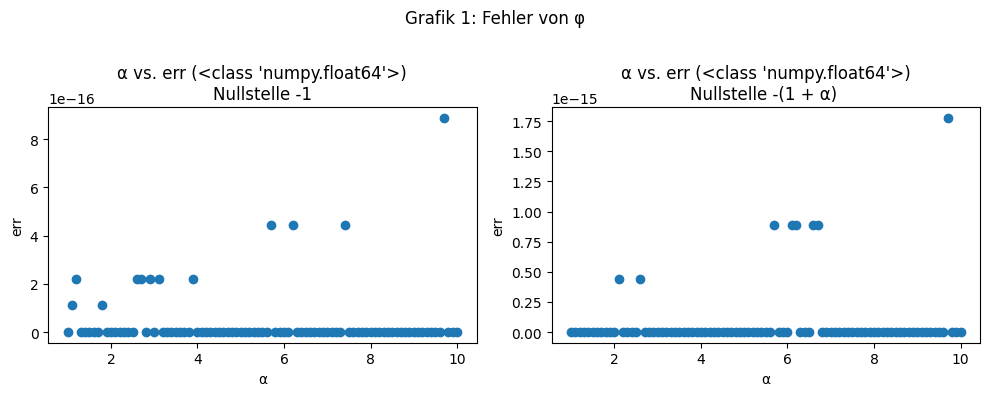

In [55]:
alphas, pq_zeros, alg_zeros, err_pos, err_neg = get_err().values();
fig = get_err_plot(alphas, err_pos, err_neg)
plt.tight_layout()
fig.savefig(path)


# c) Erklaeren Sie den Plot mit dem Wissen ueber die schlechte Kondition von φ (Praesenzblatt).
Laut dem Praesenzblatt ist φ gutkonditioniert wenn  `q > 0` und schlechtkonditioniert, z.B wenn `q ~= -p^2`. Unten sehen wir eine Grafik mit dem Verhaeltnis zwischen `q` und `α`:

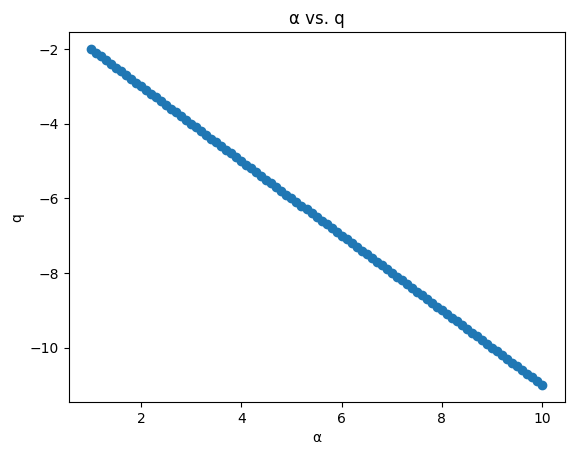

In [44]:
q_vals = [get_pq(a)[1] for a in alphas]
plt.scatter(alphas, q_vals)
plt.title(f"α vs. q")
plt.xlabel("α")
plt.ylabel("q")
plt.show()

`q` ist also fuer unsere Wahl von α stets negativ. Je groesser α, desto negativer `q`. φ ist also in dieser Hinsicht vom Anfang an *NICHT* gutkonditioniert.

Die andere Bedingung, die dazu fuehren soll, das φ schlechtkonditioniert ist, ist `q ~= -p^2`. Unten sehen wir eine Grafik von diesem Verhaeltnis:

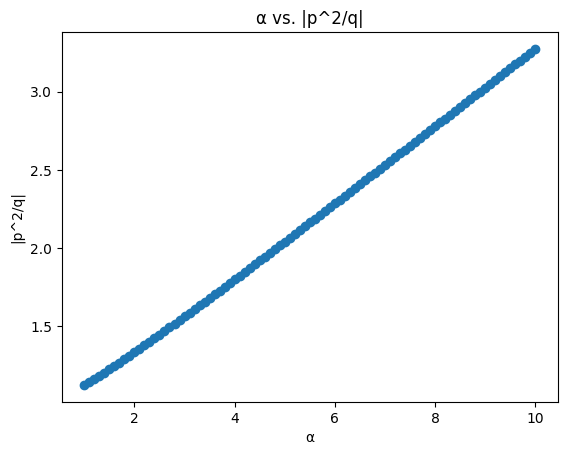

In [45]:
mp2_q_vals = [np.abs((get_pq(a)[0])**2/get_pq(a)[1]) for a in alphas]
plt.scatter(alphas, mp2_q_vals)
plt.title(f"α vs. |p^2/q|")
plt.xlabel("α")
plt.ylabel("|p^2/q|")
plt.show()

Also `q ~= -p^2`, wenn α relativ klein ist. Sie gehen weiter auseinander, je groesser α wird. Allerdings sieht man in Grafik 1, dass mehr Fehler fuer kleinere Werte von α auftreten als fuer grosse Werte von α, vor allem bei der Berechnung von der Nullstelle 1.

# d) Vergleichen Sie die Plots fuer Gleitkommazahlen mit verschiedener Praezision.

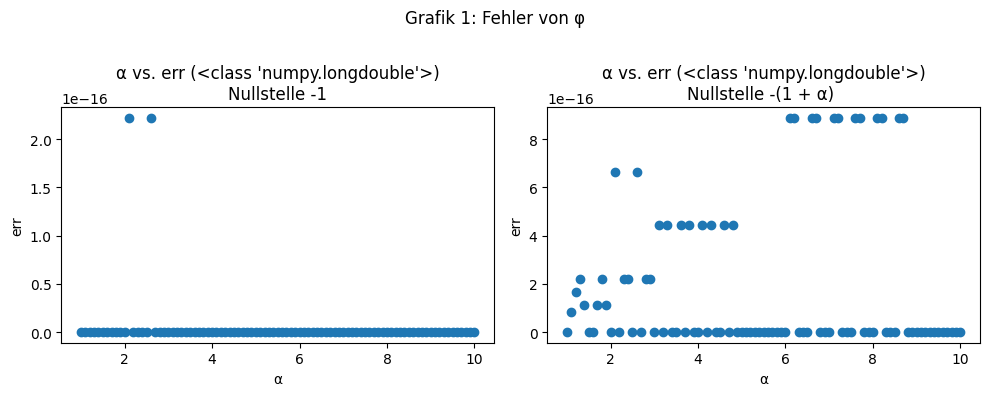

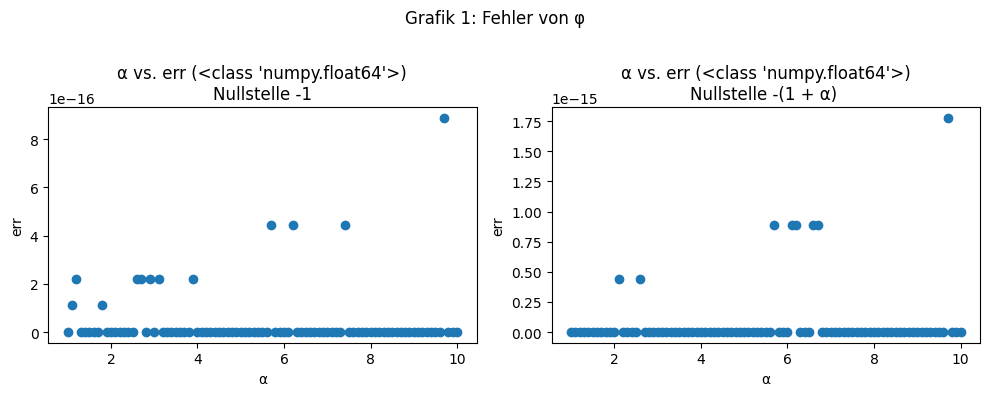

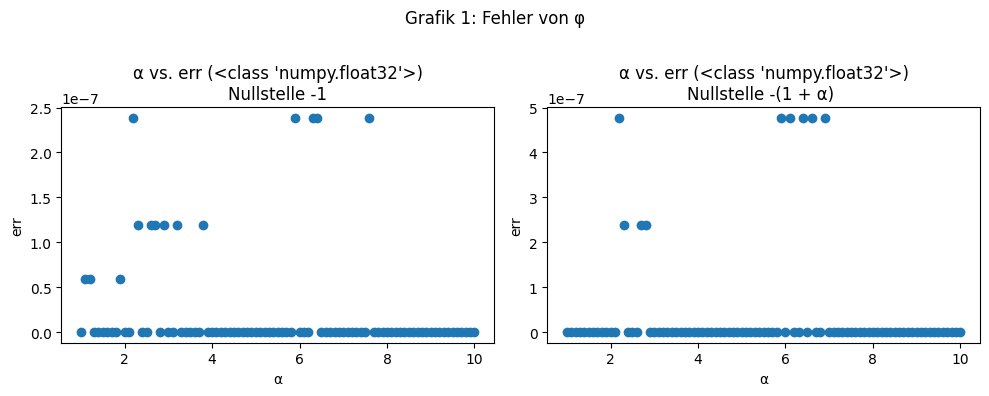

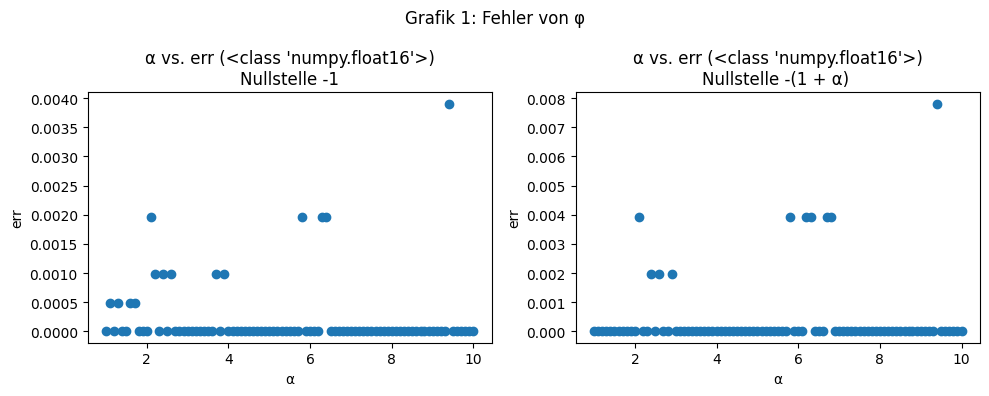

In [58]:
for idx, float_t in enumerate(FLOAT_TYPES):
    path = outdir / f"alpha_vs_err_{idx}"
    alphas, pq_zeros, alg_zeros, err_pos, err_neg = get_err(float_t=float_t).values();
    fig = get_err_plot(alphas, err_pos, err_neg, float_t=float_t)
    plt.tight_layout()
    fig.savefig(path)
